<a href="https://colab.research.google.com/github/ManuWalls/Artificial_Intelligence-/blob/main/FBAct_1_Programacion_simbolica_ManuelParedesS%C3%A1nchez_1953821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion del potencial de GHK en lenguaje simbolico matematico

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.

La actividad consiste en escribir de manera correcta el valor de la variable o de la funcion faltante dentro de una celda remplazando el valor `None`. Ejemplo:

In [1]:
K_o = 125
K_i = 30

# Definal el valor de relacion de concentracion de potacio extracelular
# respecto a la concentracion intracelular del mismo ion.

dKio = K_o/K_i
dKio

4.166666666666667

Resultado esperado: `dKio = K_o/K_i`

Tabla 1 de valores de concentracion.

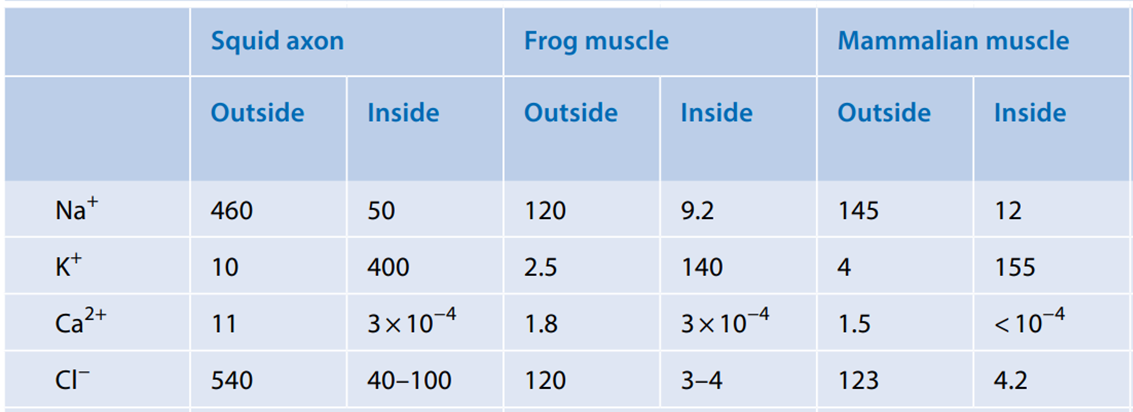

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [2]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [3]:
from sympy import Symbol
from sympy import log

Definicion de variables simples y de metodo de representacion

In [4]:
x = Symbol('x')
x

x

In [5]:
y = Symbol('y')
y

y

In [6]:
z = x**2+y**3+3*x*y+2*y-3*x

In [7]:
z

x**2 + 3*x*y - 3*x + y**3 + 2*y

Solucion de operaciones con variables simbolicas mediante la asignacion de valores numericos a las variables simbolicas matematicas

In [8]:
z = 3*x+y
z

3*x + y

In [9]:
z.subs({x:3,y:1})

10

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [10]:
R = Symbol('R') #8.314
T = Symbol('T') #298
F = Symbol('F') #96485

Definicion de variables para calcular el potencial de Nernst del K

In [11]:
K_in = Symbol('K_in')  #140
K_out = Symbol('K_out') #2.5
K_z = Symbol('K_z')    #1

Definicion de la funcion del potencial de Nernst del K

In [12]:
V_K = -(R*T/(K_z*F))*log(K_in/K_out)
V_K

-R*T*log(K_in/K_out)/(F*K_z)

Resultado esperado.


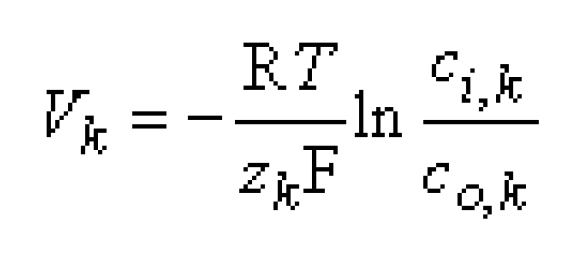

Asignacion de valores numericos a las variables de concentracion de K

In [13]:
V_K.subs({R: 8.314, T: 298, F: 96485, K_in: 140, K_out: 2.5, K_z: 1})

-0.103364239406313

Obtenga el potencial de Nernst del Sodio y del Cloro del musculo de rana con los datos de la Tabla 1.

Recuerde definir las variables necesarias, mostrar la ecuacion en lenguaje simbolico en una celda, y el resultado de la operacion en la siguiente celda.

In [14]:
Na_in = Symbol('Na_in')
Na_out = Symbol('Na_out')
Na_z = Symbol('Na_z')

In [15]:
V_Na = -(R*T/(Na_z*F))*log(Na_in/Na_out)
V_Na

-R*T*log(Na_in/Na_out)/(F*Na_z)

In [16]:
V_Na.subs({R: 8.314, T: 298, F: 96485, Na_in: 9.2, Na_out: 120, Na_z: 1})

0.0659493089884531

In [17]:
Cl_in = Symbol('Cl_in')
Cl_out = Symbol('Cl_out')
Cl_z = Symbol('Cl_z')

In [18]:
V_Cl = -(R*T/(Cl_z*F))*log(Cl_in/Cl_out)
V_Cl

-R*T*log(Cl_in/Cl_out)/(Cl_z*F)

In [26]:
V_Cl.subs({R: 8.314, T: 298, F: 96485, Cl_in: 3, Cl_out: 120, Cl_z: -1}).evalf()

-0.0947242001024820

## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



In [31]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un axon de calamar

# Definición de las constantes
R = Symbol('R')   #8.314  # J/(mol·K)
T = Symbol('T')   #298
F = Symbol('F')   #96485

# Valores de permeabilidad para el axón de calamar
P_Na = Symbol('P_Na') #0.04
P_K = Symbol('P_K')   #1
P_Cl = Symbol('P_Cl') #0.45

# Concentraciones (en mM)
P_K_out = Symbol('P_K_out')    #10
P_Na_out = Symbol('P_Na_out')  #460
P_Cl_out = Symbol('P_Cl_out')  #540

P_K_in = Symbol('P_K_in')     #400
P_Na_in = Symbol('P_Na_in')   #50
P_Cl_in = Symbol('P_Cl_in')   #45

# Integre las variables definiadas en la funcion de GHK
V_axon_calamar = (R * T / F) * log((P_K * P_K_out + P_Na * P_Na_out + P_Cl * P_Cl_in) / (P_K * P_K_in + P_Na * P_Na_in + P_Cl * P_Cl_out))
V_axon_calamar

R*T*log((P_Cl*P_Cl_in + P_K*P_K_out + P_Na*P_Na_out)/(P_Cl*P_Cl_out + P_K*P_K_in + P_Na*P_Na_in))/F

In [33]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon_calamar.subs({R: 8.314, T: 298, F: 96485, P_Cl: 0.45, P_Cl_in: 90, P_Cl_out: 540, P_K: 1, P_K_in: 400, P_K_out: 10, P_Na: 0.00000002, P_Na_in: 50, P_Na_out: 460})

-0.0574319636585576

Repita el proceso de las 2 celdas anteriores para obtener el potencial de GHK de un musculo de rana y uno de un mamifero.

In [35]:
V_Musculo_de_rana = (R * T / F) * log((P_K * P_K_out + P_Na * P_Na_out + P_Cl * P_Cl_in) / (P_K * P_K_in + P_Na * P_Na_in + P_Cl * P_Cl_out))
V_Musculo_de_rana

R*T*log((P_Cl*P_Cl_in + P_K*P_K_out + P_Na*P_Na_out)/(P_Cl*P_Cl_out + P_K*P_K_in + P_Na*P_Na_in))/F

In [37]:
V_Musculo_de_rana.subs({R: 8.314, T: 298, F: 96485, P_Cl: 0.000004, P_Cl_in: 4, P_Cl_out: 120, P_K: 0.000002, P_K_in: 140, P_K_out: 2.5, P_Na: 0.00000004, P_Na_in: 9.2, P_Na_out: 120})

-0.0868807230425001

In [38]:
V_Musculo_de_un_mamifero = (R * T / F) * log((P_K * P_K_out + P_Na * P_Na_out + P_Cl * P_Cl_in) / (P_K * P_K_in + P_Na * P_Na_in + P_Cl * P_Cl_out))
V_Musculo_de_un_mamifero

R*T*log((P_Cl*P_Cl_in + P_K*P_K_out + P_Na*P_Na_out)/(P_Cl*P_Cl_out + P_K*P_K_in + P_Na*P_Na_in))/F

In [39]:
V_Musculo_de_un_mamifero.subs({R: 8.314, T: 298, F: 96485, P_Cl: 0.45, P_Cl_in: 4.2, P_Cl_out: 123, P_K: 1, P_K_in: 155, P_K_out: 4, P_Na: 0.04, P_Na_in: 12, P_Na_out: 145})

-0.0742698548920003

## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f = 60  # Frecuencia en Hz
T = 1 / f  # Periodo en segundos
tiempo_simulacion = 2 * T  # Simular por 2 periodos de onda
muestras_por_periodo = 1000
num_muestras = int(muestras_por_periodo * tiempo_simulacion)
t = np.linspace(0, tiempo_simulacion, num_muestras)
Na_out = 460
Na_in = 50

# Definir concentración de iones de sodio (Na) y su variación sinusoidal
C_Na_min = min(Na_out, Na_in)  # Concentración mínima de Na en mM
variacion_Na = 0.1 * C_Na_min  # 10% del valor mínimo de concentración de Na

In [55]:
#Declaración de variables de Na

Na_out_squid = Symbol('Na_out_squid')
Na_in_squid = Symbol('Na_in_squid')

In [56]:
#Cálculo de ENa
ENa = ((R * T)/F)*log(Na_out_squid/Na_in_squid)
ENa

0.0166666666666667*R*log(Na_out_squid/Na_in_squid)/F

In [57]:
ENa = ENa.subs({R:8.314,T:298,F:96485,Na_out_squid:460,Na_in_squid:50}).evalf()
ENa

3.18710296357521e-6

In [58]:
# Generar la señal sinusoidal para la variación de concentración de Na
Vin = np.sin(2*np.pi*f*t)
Vin

array([ 0.00000000e+00,  3.82683432e-01,  7.07106781e-01,  9.23879533e-01,
        1.00000000e+00,  9.23879533e-01,  7.07106781e-01,  3.82683432e-01,
        5.66553890e-16, -3.82683432e-01, -7.07106781e-01, -9.23879533e-01,
       -1.00000000e+00, -9.23879533e-01, -7.07106781e-01, -3.82683432e-01,
       -1.13310778e-15,  3.82683432e-01,  7.07106781e-01,  9.23879533e-01,
        1.00000000e+00,  9.23879533e-01,  7.07106781e-01,  3.82683432e-01,
        3.67394040e-16, -3.82683432e-01, -7.07106781e-01, -9.23879533e-01,
       -1.00000000e+00, -9.23879533e-01, -7.07106781e-01, -3.82683432e-01,
       -2.26621556e-15])

In [59]:
# Cálculo de VNa
VNa = ENa * Vin
VNa

array([0, 1.21965150140191e-6, 2.25362211788377e-6, 2.94449919605320e-6,
       3.18710296357521e-6, 2.94449919605320e-6, 2.25362211788377e-6,
       1.21965150140191e-6, 1.80566558109445e-21, -1.21965150140191e-6,
       -2.25362211788377e-6, -2.94449919605320e-6, -3.18710296357521e-6,
       -2.94449919605320e-6, -2.25362211788377e-6, -1.21965150140191e-6,
       -3.61133116218890e-21, 1.21965150140191e-6, 2.25362211788377e-6,
       2.94449919605320e-6, 3.18710296357521e-6, 2.94449919605320e-6,
       2.25362211788377e-6, 1.21965150140192e-6, 1.17092263286863e-21,
       -1.21965150140191e-6, -2.25362211788377e-6, -2.94449919605320e-6,
       -3.18710296357521e-6, -2.94449919605320e-6, -2.25362211788377e-6,
       -1.21965150140192e-6, -7.22266232437779e-21], dtype=object)

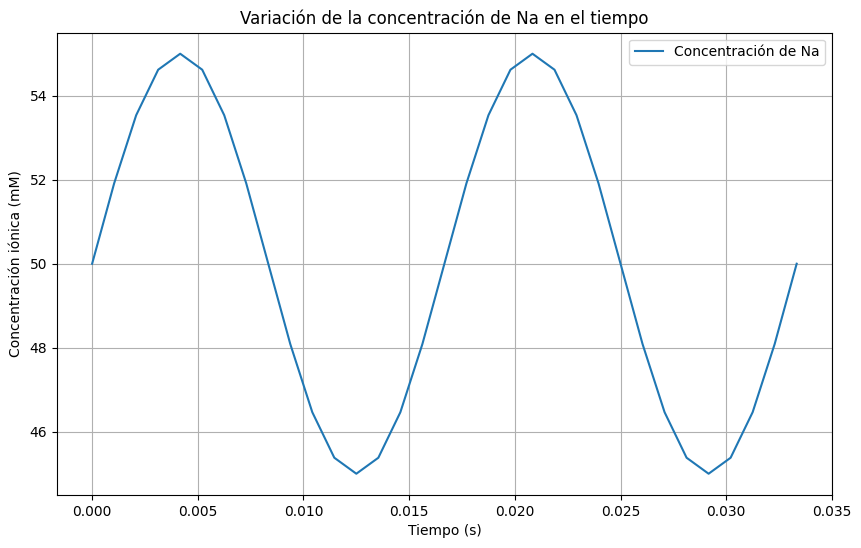

In [60]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, C_Na, label='Concentración de Na')
plt.title('Variación de la concentración de Na en el tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración iónica (mM)')
plt.grid(True)
plt.legend()
plt.show()

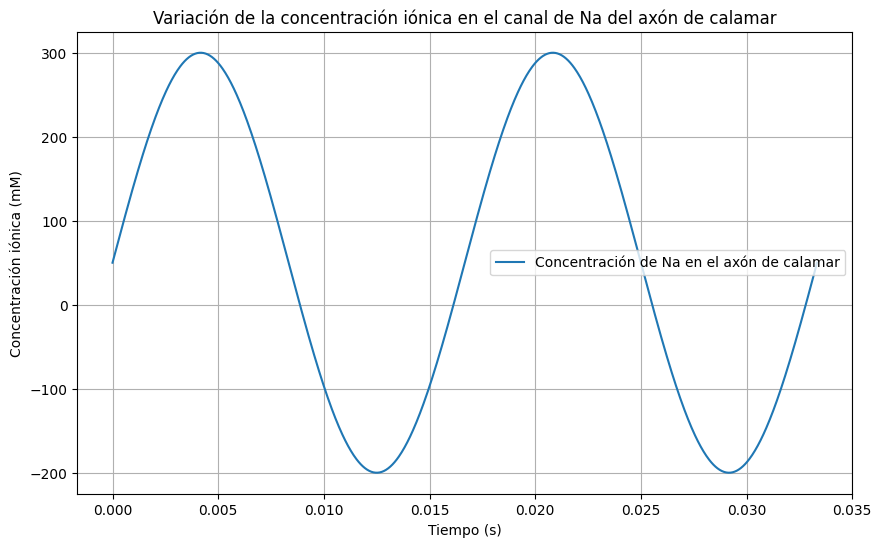

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes y valores iniciales de concentración iónica
Na_in = 50
amplitude = 0.1 * Na_in  # Amplitud 10% del valor mínimo de concentración

# Parámetros de la onda sinusoidal
f = 60  # Frecuencia en Hz
T = 1 / f  # Período en segundos
t = np.linspace(0, 2*T, 1000)  # 2 períodos de onda, 1000 puntos

# Generar la onda sinusoidal
Vin = amplitude * np.sin(2 * np.pi * f * t)

# Calcular la señal de entrada para el canal de Na
ENa = 50  # Suponiendo una diferencia de potencial para el Na
VNa = ENa * Vin

# Agregar la variación sinusoidal al canal de Na
Na_in_variation = Na_in + VNa

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, Na_in_variation, label='Concentración de Na en el axón de calamar')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración iónica (mM)')
plt.title('Variación de la concentración iónica en el canal de Na del axón de calamar')
plt.legend()
plt.grid(True)
plt.show()